# Проект по исследованию доходности от пользователей сервиса проката самокатов GoFast.

 В нашем распоряжении данные о некоторых пользователях из нескольких городов - о длительности их поездок, расстоянии, возрасте и наличии подписки. А также тарифы на пользование самокатом.

Цель проекта - выявить, являются ли пользователи с подпиской более выгодными для компании.

План выполнения проекта:

    
Шаг 1. Загрузка необходимых для работы библиотек и данных.
* 1.2 Изучение общей информации о каждом датафрейме.

Шаг 2. Предобработка данных:
* 2.1 Приведем столбец date к типу даты pandas.
* 2.2 Создадим новый столбец с номером месяца на основе столбца date.
* 2.3 Проверим наличие пропущенных значений и дубликатов в датафреймах.

Шаг 3. Исследовательский анализ данных - опишем и визуализируйте общую информацию о пользователях и поездках:
* 3.1 частота встречаемости городов;
* 3.2 соотношение пользователей с подпиской и без подписки;
* 3.3 возраст пользователей;
* 3.4 расстояние, которое пользователь преодолел за одну поездку;
* 3.5 продолжительность поездок.

Шаг 4. Объединим данные о пользователях, поездках и подписках в один датафрейм.
* 4.1 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4:
c данными о пользователях без подписки;
с данными о пользователях с подпиской.
* 4.2 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

Шаг 5. Подсчёт выручки
* 5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
* 5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 

Шаг 6. Проверка гипотез
* 6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? 
* 6.2 Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
* 6.3 Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
* 6.4 Ответим на вопрос какой тест нам понадобился бы для проверки такой гипотезы: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. 

#### Шаг 1. Загрузка данных

#####  Импортируем необходимые для исследования библиотеки.

In [1]:
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
import seaborn as sns

#####  Сохраним датафреймы в переменных и посмотрим на первые несколько строк.

In [2]:
users_go = pd.read_csv('/datasets/users_go.csv')
rides_go = pd.read_csv('/datasets/rides_go.csv')
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
users_go.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


В users_go нет пропусков. Типы данных соответствуют содержимому.

In [5]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [6]:
rides_go.head(5)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [7]:
subscriptions_go.head(5)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Пропусков нет. Типы данных соответствуют содержимому.

#### Шаг 2. Предобработка данных

##### Проверим данные на пропуски и проведем изменение типов данных.

В rides_go нет пропусков. Тип данных в столбце date не соответствуют содержимому. Изменим на datetime:

In [9]:
rides_go['date'] = pd.to_datetime(rides_go['date'], format="%Y-%m-%d")
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Добавим столбец с номером месяца:

In [10]:
rides_go['month_number'] = pd.DatetimeIndex(rides_go['date']).month
rides_go.head()

,user_id,distance,duration,date,month_number
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Проверить за какой период представлены данные, чтобы убедиться что данные за несколько лет не склеиются при агрегации по месяцам.

In [11]:
pd.DatetimeIndex(rides_go['date']).year.sort_values()

Int64Index([2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', name='date', length=18068)

Данные предоставлены за 2021 год.

В данных отсутствуют пропуски, что мы увидели при вызове метода info() для каждого фрейма.

##### Обработаем явные дубликаты в таблицах:

Проверим наличие явных дубликатов.

In [12]:
users_go['user_id'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1560     True
1561     True
1562     True
1563     True
1564     True
Name: user_id, Length: 1565, dtype: bool

Видим повторяющиеся значения, некоторые пользователи задублированы. Удалим дубликаты и проверим выполненную работу.

In [13]:
users_go = users_go.drop_duplicates().reset_index(drop=True)

In [14]:
users_go.value_counts()

user_id  name       age  city            subscription_type
1        Кира       22   Тюмень          ultra                1
1020     Камилла    32   Москва          free                 1
1029     Игорь      21   Краснодар       free                 1
1028     Вадим      17   Сочи            free                 1
1027     Мария      21   Сочи            free                 1
                                                             ..
510      Роман      24   Ростов-на-Дону  ultra                1
509      Ян         29   Москва          ultra                1
508      Станислав  15   Тюмень          ultra                1
507      Эвелина    27   Пятигорск       ultra                1
1534     Альберт    25   Краснодар       free                 1
Length: 1534, dtype: int64

In [15]:
rides_go.value_counts()

user_id  distance     duration   date        month_number
1        748.690645   15.041884  2021-11-22  11              1
1105     3232.037291  19.120140  2021-02-24  2               1
         4661.122393  21.159450  2021-03-25  3               1
         4468.509613  12.937019  2021-11-28  11              1
         4057.692285  21.695055  2021-06-05  6               1
                                                            ..
645      4040.109793  17.100274  2021-11-26  11              1
646      2635.251399  11.081349  2021-09-06  9               1
         2853.140708  23.699278  2021-01-28  1               1
         3442.376310  22.753041  2021-03-17  3               1
1534     4928.173852  22.560373  2021-09-13  9               1
Length: 18068, dtype: int64

В rides_go дубликатов нет.

##### Проверим столбцы с возрастом и расстоянием на аномальные значения:

In [16]:
users_go.sort_values(by='age')

,user_id,name,age,city,subscription_type
664,665,Герман,12,Сочи,ultra
66,67,Анастасия,12,Ростов-на-Дону,ultra
727,728,Вячеслав,12,Пятигорск,free
34,35,Руслан,12,Пятигорск,ultra
235,236,Владимир,13,Тюмень,ultra
...,...,...,...,...,...
383,384,Виктор,38,Омск,ultra
804,805,Петр,38,Тюмень,free
453,454,Вероника,38,Краснодар,ultra
961,962,Дмитрий,39,Москва,free


В столбце с возрастом аномальных значений нет.

In [17]:
rides_go.sort_values(by='duration').head(30)

,user_id,distance,duration,date,month_number
12013,1102,4602.122401,0.5,2021-08-01,8
17314,1483,4445.481070,0.5,2021-03-06,3
15029,1318,5894.633314,0.5,2021-03-28,3
7437,766,4539.088310,0.5,2021-12-22,12
12967,1172,4907.140751,0.5,2021-12-19,12
15015,1317,4593.389022,0.5,2021-07-16,7
13012,1176,4935.071045,0.5,2021-05-14,5
7508,772,4718.820996,0.5,2021-05-22,5
16589,1428,5059.187375,0.5,2021-05-06,5
9049,890,4848.485014,0.5,2021-11-20,11


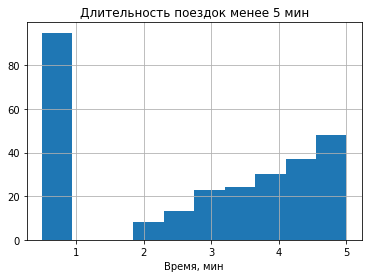

In [18]:
rides_min = rides_go.query('duration < 5')
rides_min['duration'].hist().set(title='Длительность поездок менее 5 мин',xlabel='Время, мин')
plt.show()

Почти 100 значений с продолжительностью 0,5 минут. Это меньше 1%, оставим как есть, это не повлияет на исследование.

#### Шаг 3. Исследовательский анализ данных

Опишите и визуализируйте общую информацию о пользователях и поездках:
3.1 частота встречаемости городов;
3.2 соотношение пользователей с подпиской и без подписки;
3.3 возраст пользователей;
3.4 расстояние, которое пользователь преодолел за одну поездку;
3.5 продолжительность поездок.

##### Посмотрим на частоту встречаемости городов среди пользователей:

In [19]:
city_frequency = users_go['city'].value_counts()
city_frequency

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

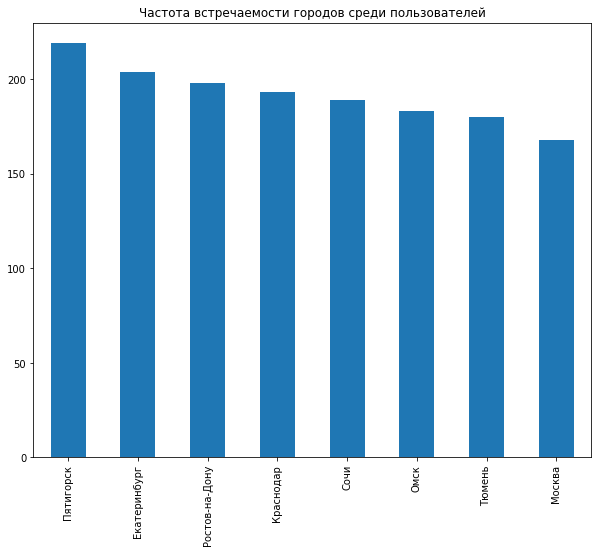

In [20]:
city_frequency.plot(
    kind = 'bar', 
    y = city_frequency,
    figsize=(10,8), 
    title = 'Частота встречаемости городов среди пользователей');

ТОП 3 - Пятигорск, Екатеринбург и Ростов-н-Дону.

##### Проверим  как соотносятся пользователи с подпиской и без подписки:

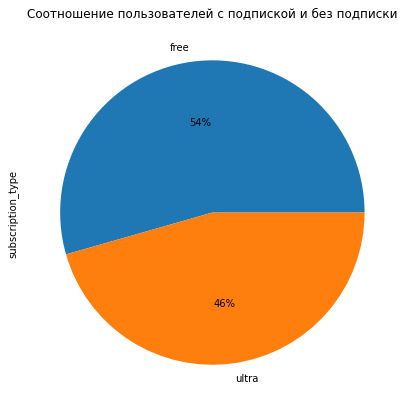

In [21]:
users_go['subscription_type'].value_counts().plot(
    kind = 'pie',
    autopct = '%1.0f%%',
    figsize=(15,7), 
    title = 'Соотношение пользователей с подпиской и без подписки');

In [22]:
users_go['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

Пользователей без подписки больше - 835 человек, 54% от общего количества.

##### Узнаем какой возраст встречается чаще других:

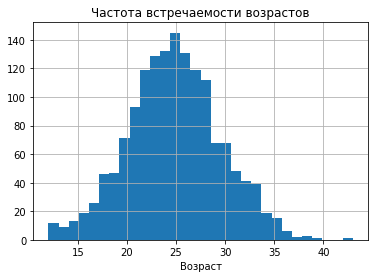

In [23]:
users_go['age'].hist(bins=30).set(title='Частота встречаемости возрастов',xlabel='Возраст')
plt.show()

Пользователи по возрасту, ожидаемо, распределены нормально. Большинство пользователей возрастом около 25 лет.

##### Визуализируем данные о расстоянии, которое пользователь преодолел за одну поездку:

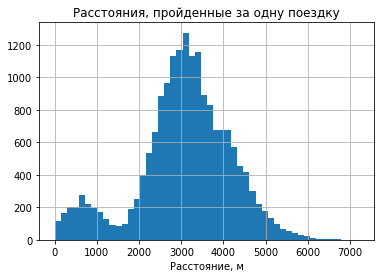

In [24]:
rides_go['distance'].hist(bins=50).set(title='Расстояния, пройденные за одну поездку', xlabel='Расстояние, м')
plt.show()

У графика явно выражены 2 вершины - около 700 метров и около 3100 метров.

In [25]:
rides_go['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Есть минимальные значения 0,85 м - возможно есть аномалии в данных, проверим:

In [26]:
rides_go.query('distance < 50').sort_values(by='distance')

,user_id,distance,duration,date,month_number
11555,1069,0.855683,10.001902,2021-01-31,1
9541,925,2.570787,3.011018,2021-10-19,10
13690,1223,4.329506,4.008958,2021-05-22,5
8658,861,6.784447,6.015656,2021-07-21,7
7841,796,7.097072,10.026614,2021-11-26,11
8906,880,11.283615,2.035632,2021-03-28,3
8324,835,12.233115,4.034952,2021-09-19,9
13940,1240,15.000606,10.045002,2021-08-20,8
15626,1364,15.366168,6.057623,2021-08-22,8
11862,1091,15.630873,13.044660,2021-03-29,3


Расстояния не выглядят аномальными, возможно дейстаительно имела место быть такая короткая поездка - может быть пользователь передумал.

##### Выявим  самые продолжительные поездки:

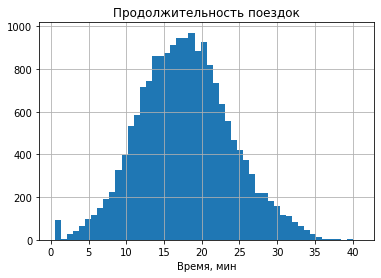

In [27]:
rides_go['duration'].hist(bins=50).set(title='Продолжительность поездок', xlabel='Время, мин')
plt.show()

На графике видим самые продолжительные поездки между 15 и 20 минутами.

In [28]:
rides_go['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Числовое описание данных показывает малый разброс данных, так как медиана почти равна среднему. А также аномально низкий min. Построим диаграмму boxplot для визуализации.

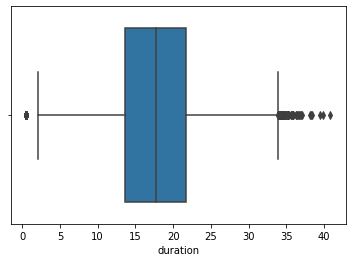

In [29]:
sns.boxplot(x=rides_go['duration'])
plt.show()

На диаграмме видим, что основное количество поездок распределено по времени между 14 и 22 минутами. Также имеем небольшой выброс возле нуля - это некорректные данные, и ряд редких значений от 35 до 41 минуты.

#### Шаг 4. Объединение данных

##### Объединим 3 таблицы в одну методом merge().

In [30]:
data = users_go.merge(rides_go, on='user_id', how='left').merge(subscriptions_go, on='subscription_type', how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month_number       18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [31]:
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month_number         0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

В получившейся таблице 18068 строк как и в users_go, по которой объединяли данные. Пропуски отсутствуют.

##### Создайте ещё два датафрейма :
* с данными о пользователях с подпиской.

In [32]:
data_subscription_ultra = data.loc[data['subscription_type'] == 'ultra']
data_subscription_ultra.tail(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199
6499,699,Оксана,22,Москва,ultra,3202.890770,25.217345,2021-12-03,12,6,0,199


* c данными о пользователях без подписки

In [33]:
data_subscription_free = data.loc[data['subscription_type'] == 'free']
data_subscription_free.tail(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0
18067,1534,Альберт,25,Краснодар,free,2371.711192,15.893917,2021-12-29,12,8,50,0


##### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

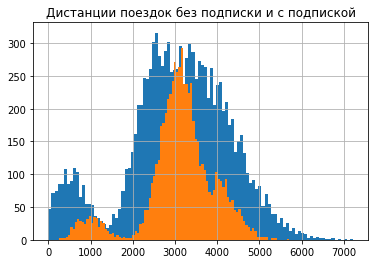

In [34]:
data_subscription_free['distance'].hist(bins=100)
data_subscription_ultra['distance'].hist(bins=100).set(title='Дистанции поездок без подписки и с подпиской')

plt.show()

Графики имеют похожие тенденции, выделяется большее количество коротких поездок у пользователей без подписки.

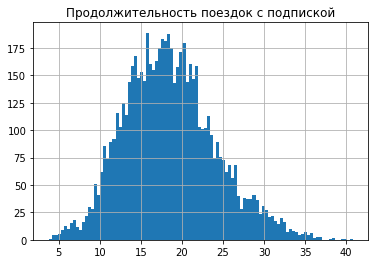

In [35]:
data_subscription_ultra['duration'].hist(bins=100).set(title='Продолжительность поездок с подпиской')
plt.show()

Посмотрим на числовое описание данных о времени поездки для пользователей с подпиской:

In [36]:
data_subscription_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

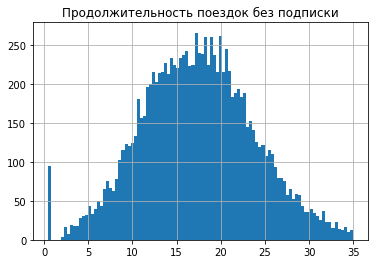

In [37]:
data_subscription_free['duration'].hist(bins=100).set(title='Продолжительность поездок без подписки')
plt.show()

Посмотрим на числовое описание данных о времени поездки для пользователей без подписки:

In [38]:
data_subscription_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

Тенденции на графиках идентичны, и в то же время есть различия:
* минимальное время у пользователей с подпиской - выше. 3.76 мин против 0.5 у пользователей без подписки.
* максимальное время у пользователей с подпиской - выше. 40.82 мин против 34.94 у пользователей без подписки.
* разница между средним и медианой у пользователей с подпиской почти не заметна - что говорит о низких выбросах и соответственно о более стабильном использовании сервиса.

#### Шаг 5. Подсчёт выручки

##### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными и найдем:
* суммарное расстояние; 
* количество поездок;
* суммарное время для каждого пользователя за каждый месяц.

Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округлим до следующего целого числа.

In [39]:
data['duration'] = np.ceil(data['duration'])

In [40]:

data_agg = pd.pivot_table(data,
                                values=['distance', 'duration','name','subscription_type'], 
                                index=['user_id','month_number'], 
                                aggfunc={'distance': sum, 'duration': sum,'name': len, 'subscription_type':min})

data_agg = data_agg.rename(columns={'user_id' : 'quantity','name' : 'quantity'})
data_agg

distance  duration  quantity subscription_type
user_id month_number                                                    
1       1              7027.511294      42.0         2             ultra
        4               754.159807       7.0         1             ultra
        8              6723.470560      46.0         2             ultra
        10             5809.911100      32.0         2             ultra
        11             7003.499363      56.0         3             ultra
...                            ...       ...       ...               ...
1534    6              3409.468534      26.0         2              free
        8              7622.453034      48.0         2              free
        9              4928.173852      23.0         1              free
        11            13350.015305      78.0         4              free
        12             2371.711192      16.0         1              free

[11331 rows x 4 columns]

In [41]:
data_agg.isna().sum()

distance             0
duration             0
quantity             0
subscription_type    0
dtype: int64

Пропуски отсутствуют.

##### Добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. 

In [42]:
def user_revenue(data_agg):
    if data_agg['subscription_type'] == 'ultra':
        return 6*data_agg['duration']+199
    elif data_agg['subscription_type'] == 'free':
        return 50*data_agg['quantity']+8*data_agg['duration']
            

In [43]:
data_agg['revenue'] = data_agg.apply(user_revenue,axis=1)
data_agg

distance  duration  quantity subscription_type  \
user_id month_number                                                       
1       1              7027.511294      42.0         2             ultra   
        4               754.159807       7.0         1             ultra   
        8              6723.470560      46.0         2             ultra   
        10             5809.911100      32.0         2             ultra   
        11             7003.499363      56.0         3             ultra   
...                            ...       ...       ...               ...   
1534    6              3409.468534      26.0         2              free   
        8              7622.453034      48.0         2              free   
        9              4928.173852      23.0         1              free   
        11            13350.015305      78.0         4              free   
        12             2371.711192      16.0         1              free   

                      revenue  
user_id month_number           
1       1               451.0  
        4               241.0  
        8               475.0  
        10              391.0  
        11              535.0  
...                       ...  
1534    6               308.0  
        8               484.0  
        9               234.0  
        11              824.0  
        12              178.0  

[11331 rows x 5 columns]

#### Шаг 6. Проверка гипотез

##### Нам нужно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

 * Нулевая гипотеза: время пользователей с подпиской равно времени пользователей без подписки.
 * Альтернативная гипотеза: время пользователей с подпиской больше времени пользователей без подписки.

In [44]:
alpha = 0.05 # критический уровень статистической значимости

with_ultra = data.query('subscription_type=="ultra"')['duration']
with_free = data.query('subscription_type=="free"')['duration']

results = st.ttest_ind(
    with_ultra, 
    with_free,alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


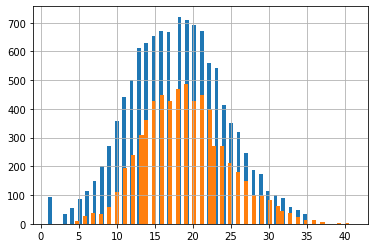

In [45]:
with_free.hist(bins=70)
with_ultra.hist(bins=70)

plt.show()

Вывод

Мы отвергли гипотезу о том, что время поездки пользователей с подпиской равно времени поездки пользователей без подписки. На графике можем наблюдать, что время поездки пользователей с подпиской больше времени поездки пользователей без подписки.

##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Проверим, можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 
* нулевая гипотеза звучит так: расстояние, которое пользователи с подпиской в среднем проезжают за одну поездку равно 3130 метров.
* альтернативная гипотеза: подписчики в среднем проезжают расстояние больше оптимального.

In [46]:
alpha = 0.05 # критический уровень статистической значимости

with_ultra_dist = data.query('subscription_type=="ultra"')['distance']
distance = 3130

results = st.ttest_1samp(
    with_ultra_dist, 
    distance,alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


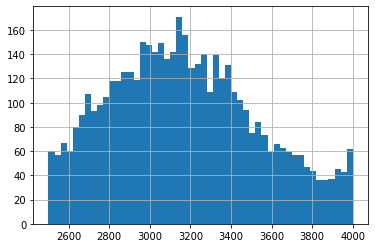

In [47]:
with_ultra_dist.hist(bins=50,range=(2500,4000))
plt.show()

Вывод: нам не удалось отвергнуть нулевую гипотезу, мы можем утверждать что расстояние, которое пользователи с подпиской в среднем проезжают за одну поездку равно 3130 метров. - не превышающее оптимальное с точки зрения износа самоката.

##### Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

* нулевая гипотеза: помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки.
* альтернативная гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [48]:
alpha = 0.05 # критический уровень статистической значимости

with_ultra = data_agg.query('subscription_type=="ultra"')['revenue']
with_free = data_agg.query('subscription_type=="free"')['revenue']

results = st.ttest_ind(
    with_ultra, 
    with_free,alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Нулевая гипотеза верна")

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Мы отвергли нулевую гипотезу в пользу альтернативной - помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

##### Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. 
 * Для проверки этой гипотезы нам понадобился бы тест scipy.stats.ttest_rel с проверкой левосторонней гипотезы alternative='less'.

#### Общий вывод.
Нам передали данные о некоторых пользователях из нескольких городов, а также об их поездках, чтобы проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Мы проверили данные на пропуски, их не оказалось. Обработали явные дубликаты. Поменяли тип данных у столбца date на datetime, добавили столбец month_number с номером месяца и удалили аномальные значения из столбца duration.

Провели исследовательский анализ данных:

* выявили, что количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. ТОП 3 по количеству пользователей - Пятигорск, Екатеринбург и Ростов-н-Дону. 
* пользователей без подписки больше, примерно на 120.
* пользователи по возрасту, ожидаемо, распределены нормально. Большинство пользователей возрастом около 25 лет.
* в основном пользователи проезжают около 700 метров и около 3100 метров.
* чаще всего длительность поездки состовляет 15 - 20 минут.

Объединили данные в одну таблицу. На основе объединенного датафрейма создали еще 2 датафрейма:

* для пользователей с ultra подпиской
* для пользователей с free подпиской
Дальше визуализировали информацию о расстоянии и времени поездки для пользоватей каждого тарифа.Графики по расстоянию имеют похожие тенденции, выделяется большее количество коротких поездок у пользователей без подписки.Тенденции на графиках по времени - идентичны, стоит отметить что пользователи без подписки не ездят более 35 мин.

Создали таблицу с агрегированными данными о поездках на основе датафрейма с объединёнными данными и найшли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
Добавили в датафрейм data_agg столбец с помесячной выручкой - revenue.

Проверили гипотезы:

1. Нам нужно было понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверили гипотезу - пользователи с подпиской в среднем тратят больше времени на поездки чем пользователи без подписки.

2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Проверили, можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Вывод: нам не удалось отвергнуть нулевую гипотезу, мы можем утверждать что расстояние, которое пользователи с подпиской в среднем проезжают за одну поездку равно 3130 метров.

3. Проверили гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки и получили вывод - средняя выручка пользователей с подпиской больше выручки пользователей без подписки.

Исходя из проверенных гипотез мы выявили что в среднем подписчики проезжают больше по времени и расстоянию, а также средняя выручка от них выше. Поэтому пользователи с подпиской являются более выгодными для компании.